In [24]:
#Data Imported via yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si

In [25]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [135]:
initial_data = yf.download("FB ^VIX", start="2020-10-01", end="2021-10-01")


[*********************100%***********************]  2 of 2 completed


In [136]:
initial_data.head()

Adj Close                  Close                   High  \
                    FB       ^VIX          FB       ^VIX          FB   
Date                                                                   
2020-09-30  261.899994  26.370001  261.899994  26.370001  266.079987   
2020-10-01  266.630005  26.700001  266.630005  26.700001  268.329987   
2020-10-02  259.940002  27.629999  259.940002  27.629999  265.149994   
2020-10-05  264.649994  27.959999  264.649994  27.959999  264.869995   
2020-10-06  258.660004  29.480000  258.660004  29.480000  265.690002   

                              Low                   Open               Volume  \
                 ^VIX          FB       ^VIX          FB       ^VIX        FB   
Date                                                                            
2020-09-30  27.120001  260.100006  25.059999  261.980011  26.690001  20142500   
2020-10-01  27.110001  264.799988  25.330000  265.350006  25.780001  20009800   
2020-10-02  29.900000  259.179993  26.930000  261.209991  28.870001  16367600   
2020-10-05  29.690001  260.839996  27.270000  262.200012  29.520000  12822300   
2020-10-06  30.000000  258.239990  26.010000  261.779999  28.049999  18696900   

                 
           ^VIX  
Date             
2020-09-30    0  
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0

In [137]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-30 to 2021-09-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      253 non-null    float64
 1   ^VIX    253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [138]:
data.head()


,FB,^VIX
Date,,
2020-09-30,261.899994,26.370001
2020-10-01,266.630005,26.700001
2020-10-02,259.940002,27.629999
2020-10-05,264.649994,27.959999
2020-10-06,258.660004,29.480000


In [139]:
data.tail()

,FB,^VIX
Date,,
2021-09-24,352.959991,17.750000
2021-09-27,353.579987,18.760000
2021-09-28,340.649994,23.250000
2021-09-29,339.609985,22.559999
2021-09-30,339.390015,23.139999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

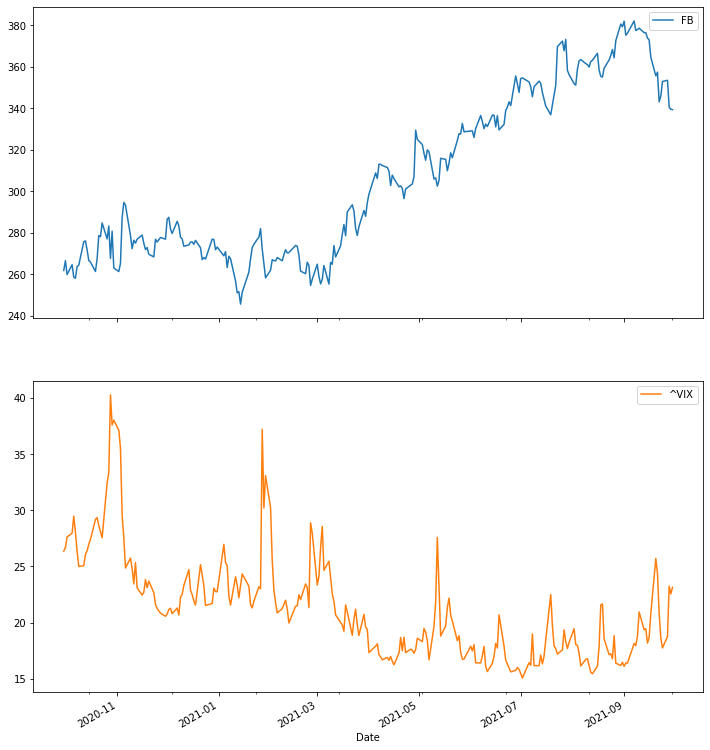

In [140]:
data.plot(figsize=(12, 14), subplots=True)

In [141]:
data.describe().round(2)


,FB,^VIX
count,253.00,253.00
mean,306.30,21.29
std,39.08,4.62
min,245.64,15.07
25%,271.97,17.69
50%,296.52,20.79
75%,341.37,23.25
max,382.18,40.28


In [142]:
#Change over time
#The FB index is the subject of this paper. It expects to look at previous index levels. We chose a  year to see how well the index's volatility has changed over time in the hopes of finding proof that volatility, contrary to several common model varies over time but is far from constant.The FB index is the subject of this paper. It expects to look at previous index levels. We chose a  year to see how well the index's volatility has changed over time in the hopes of finding proof that volatility, contrary to several common model varies over time but is far from constant.

In [143]:
data.diff().head()

,FB,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,4.730011,0.330000
2020-10-02,-6.690002,0.929998
2020-10-05,4.709991,0.330000
2020-10-06,-5.989990,1.520000


In [144]:
data.diff().describe().round(2)


,FB,^VIX
count,252.00,252.00
mean,0.31,-0.01
std,5.84,2.01
min,-17.72,-7.00
25%,-3.36,-0.95
50%,-0.04,-0.21
75%,4.07,0.81
max,22.41,14.19


In [145]:
data.pct_change().round(4).head()
#Absolute changes are not desirable from a statistical standpoint because they are dependent on the magnitude of the time series data. As a result, percentage changes are often recommended. The following code calculates and visualises the mean value of percentage changes or percentage returns (also known as simple returns) in a financial context:

,FB,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0181,0.0125
2020-10-02,-0.0251,0.0348
2020-10-05,0.0181,0.0119
2020-10-06,-0.0226,0.0544


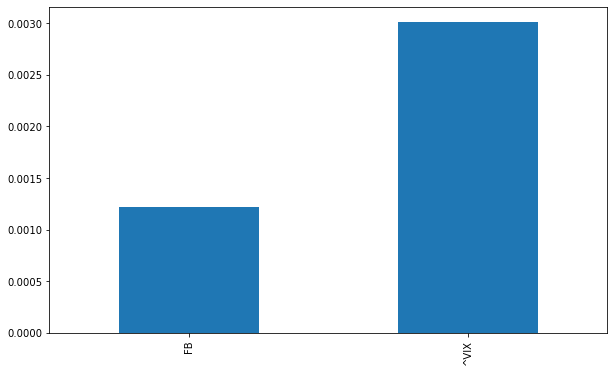

In [146]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));
#As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.


In [147]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,FB,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0179,0.0124
2020-10-02,-0.0254,0.0342
2020-10-05,0.0180,0.0119
2020-10-06,-0.0229,0.0529


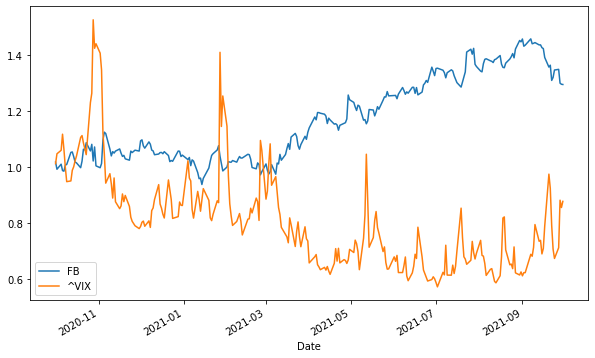

In [148]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [214]:
#Correlation Analysis

#Consider the Facebook index and the VIX volatility index as an additional example of how to deal with pandas and financial time series data. 
#When the FB rises, so does the VIX, and vice versa. It's about correlation rather than causality in this case. This section demonstrates how to generate statistical evidence to back up the stylized fact that the FB and VIX are (very) adversely connected.

In [150]:
Corr_data = data[['FB', '^VIX']].dropna()
Corr_data.tail()

,FB,^VIX
Date,,
2021-09-24,352.959991,17.750000
2021-09-27,353.579987,18.760000
2021-09-28,340.649994,23.250000
2021-09-29,339.609985,22.559999
2021-09-30,339.390015,23.139999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

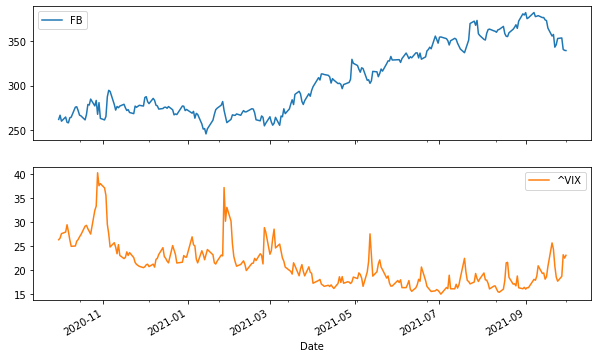

In [151]:
Corr_data.plot(subplots=True, figsize=(10, 6))

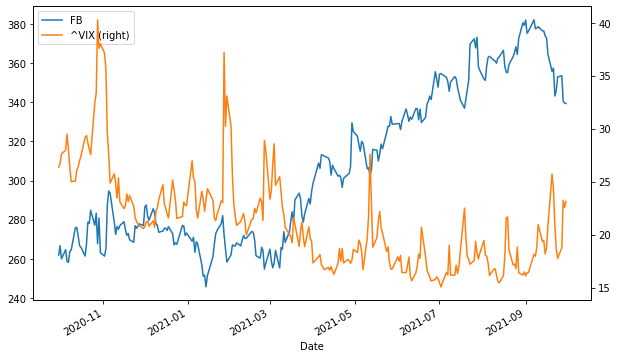

In [152]:
Corr_data.loc['2020-01-10':].plot(secondary_y='^VIX', figsize=(10, 6));

In [153]:
#Logarithmic Returns
#Returns, not absolute changes or even absolute values, are the basis of statistical analysis. As a result, before continuing with the rest of the study, we'll calculate log returns first.

In [154]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,FB,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.017899,0.012437
2020-10-02,-0.025411,0.034239
2020-10-05,0.017957,0.011873
2020-10-06,-0.022894,0.052937


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

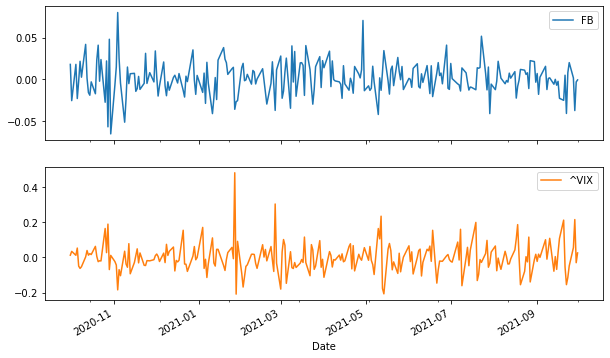

In [155]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))



array([[<AxesSubplot:xlabel='FB', ylabel='FB'>,
        <AxesSubplot:xlabel='^VIX', ylabel='FB'>],
       [<AxesSubplot:xlabel='FB', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

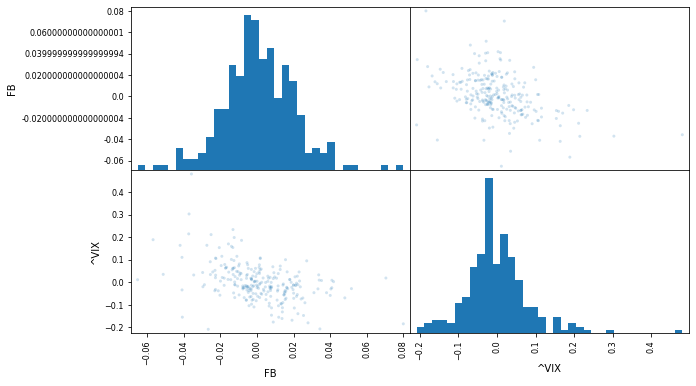

In [156]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))
#The pandas scatter matrix() plotting tool comes in helpful for visualisations in this situation. It compares the log returns of the two series, and on the diagonal, a histogram or a kernel density estimator (KDE) 

In [157]:
#OLS Regression
#An ordinary least-squares (OLS) regression analysis is simple to implement with all of these preparations.

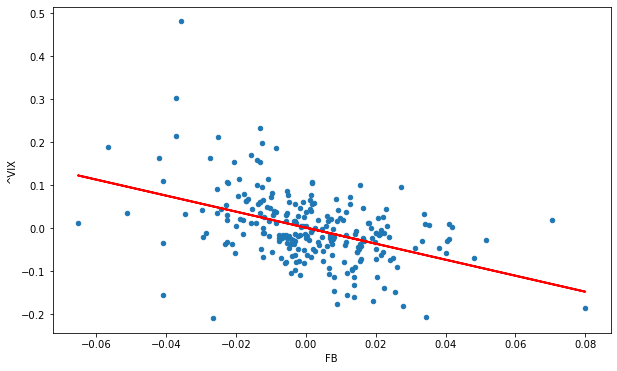

In [158]:
reg = np.polyfit(sprets['FB'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='FB', y='^VIX', figsize=(10, 6))
ax.plot(sprets['FB'], np.polyval(reg, sprets['FB']), 'r', lw=2);

In [159]:
#Correlation
#Finally, we look at correlation measures on their own. Two types of correlation measurements are considered: a static one that considers the entire data set and a rolling one that shows the correlation over time for a fixed window.

In [160]:
sprets.corr()

,FB,^VIX
FB,1.000000,-0.442171
^VIX,-0.442171,1.000000


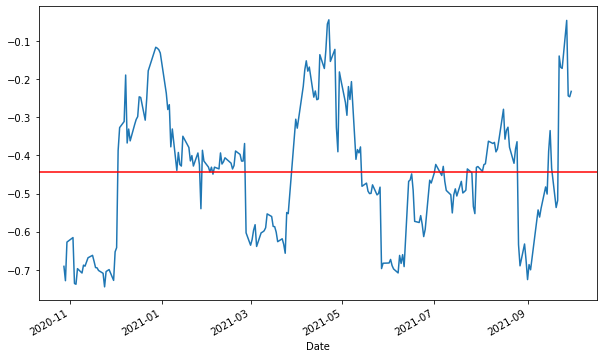

In [161]:
ax = sprets['FB'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');

In [162]:
#Using the yfinance package, I downloaded daily data for FB from Yahoo Finance (from 01/10/2020 (20) to 01/10/2021).

In [163]:
#At this point, we'll look for the FB index's log return.

S = data['FB'][-1]
print('The spot price is', round(S,2))

The spot price is 339.39


In [164]:
log_return = np.log(data['FB'] / data['FB'].shift(1))

In [165]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 31.22 %


In [166]:
VIX = yf.download("^VIX", start="2020-01-10", end="2021-01-10")

[*********************100%***********************]  1 of 1 completed


In [167]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 21.56 %


In [168]:
#Price of a put option with a strike of 450 and an expiration date of December 18, 2020.

S0 = 339.39              # spot stock price
K = 450                 # strike
T = 1.0                 # maturity 
r = 0.13                 # risk free rate 
sig = 0.2156              # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [169]:
#Binomial price tree
#Working forward from the valuation date to the expiration date produces the price tree. 
#The underlying instrument is considered to go up or down by a certain factor (u or d) per step of the tree (where, by definition, u 1 and 0 d 1) at each step. So, if S is the current price, S up = S u or S down = S d will be the price in the next period.

In [170]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [171]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [172]:
S

array([[339.39      , 384.37806274, 435.32954748, 493.0349395 ],
       [  0.        , 299.66739329, 339.39      , 384.37806274],
       [  0.        ,   0.        , 264.59396741, 299.66739329],
       [  0.        ,   0.        ,   0.        , 233.62557676]])

In [173]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.6463508029888896

In [174]:
#The option value at each node of the tree's final node—that is, at the option's expiration—is simply its intrinsic, or exercise, value: Max[(S n-K),0] for a call option and Max[(K-S n),0] for a put option, where K is the strike price and S n is the underlying asset's spot price at the n-th period.

In [175]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  65.62193726],
       [  0.        ,   0.        ,   0.        , 150.33260671],
       [  0.        ,   0.        ,   0.        , 216.37442324]])

In [176]:
#European Option

In [177]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 65.95688147,  44.75029263,  22.22298003,   0.        ],
       [  0.        , 112.97482423,  91.52646277,  65.62193726],
       [  0.        ,   0.        , 166.32249535, 150.33260671],
       [  0.        ,   0.        ,   0.        , 216.37442324]])

In [178]:
print('European ' + payoff, str( V[0,0]))

European put 65.95688146747209


In [179]:
#Greeks

In [180]:
#Monte Carlo Simulation
#There is still one Python loop, which runs over the time intervals. Over all pathways, vectorized code handles the other dimension.

In [181]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [182]:
T = 1.0
r = 0.13
sigma = 0.2156 
S0 = 339.39
K = 450

In [183]:
S = mcs_simulation_np(5000)

In [184]:
S = np.transpose(S)
S

array([[339.39      , 338.97193116, 339.06698126, ..., 366.85498332,
        367.65699961, 367.83095383],
       [339.39      , 337.98434597, 337.33045321, ..., 452.1894521 ,
        453.78050874, 454.33801317],
       [339.39      , 340.2395915 , 340.61385793, ..., 374.4643745 ,
        373.86660027, 372.6109694 ],
       ...,
       [339.39      , 340.34971139, 339.52584715, ..., 549.65700797,
        550.60430303, 550.49360466],
       [339.39      , 340.36391453, 339.40499873, ..., 391.46694938,
        391.65441964, 392.05004836],
       [339.39      , 338.31468456, 336.81408436, ..., 321.28388505,
        321.87333637, 322.49863408]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

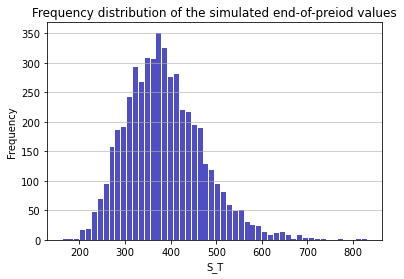

In [185]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [186]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 75.94075269587877


In [187]:
#Surface of Delta

In [188]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [189]:
euro_option_bsm(339.39, 450, 1.0, 0.13, 0, 0.3122, 'put')

78.68080702943283

In [190]:
S = np.linspace(50,150,11)
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Put [i] = euro_option_bsm(S[i], 450, 1.0, 0.13, 0, 0.3122, 'put')

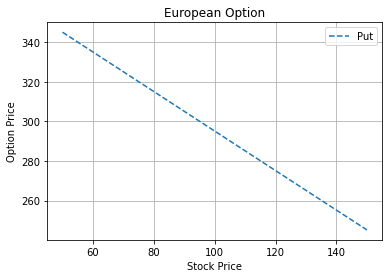

In [191]:
fig = plt.figure()
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Put'])

In [192]:
#Surface of Delta

In [193]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [194]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j],  450, T[i], 0.13, 0, 0.3122, 'put')

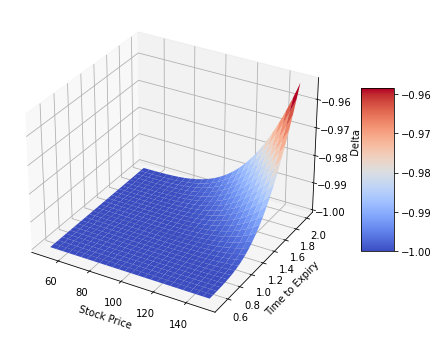

In [195]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [196]:
d = delta(339.39, 450, 1.0, 0.13, 0, 0.3122, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is -0.6297 . If the stock price increase 1 dollar, then the value of the option will increase $ -0.6297 .


In [197]:
#Surface of Gamma

In [7]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [8]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 450, T[i],0.13, 0, 0.3122, 'put')

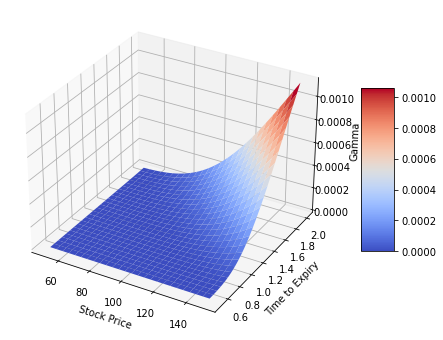

In [200]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [11]:
gamma(339.39, 450, 1.0, 0.13, 0, 0.3122, 'put')

0.003129806059395424

In [201]:
#Surface of Theta

In [12]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [13]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 450, T[i],0.13, 0, 0.3122, 'put')

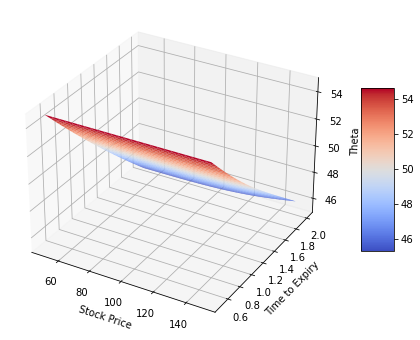

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [18]:
theta(339.39, 450, 1.0, 0.13, 0, 0.3122, 'put')

58.019939196305145

In [205]:
#Surface of Rho

In [20]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho


In [21]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 450, T[i], 0.13, 0, 0.3122, 'put')

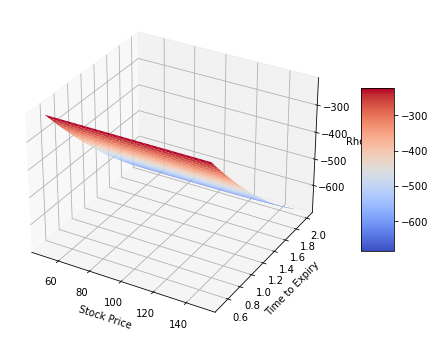

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [37]:
rho(339.39, 450, 1.0, 0.13, 0, 0.3122, 'put')

-292.3974355694443

In [209]:
#Surface of Vega

In [28]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [29]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 450, T[i], 0.13, 0, 0.3122, 'put')

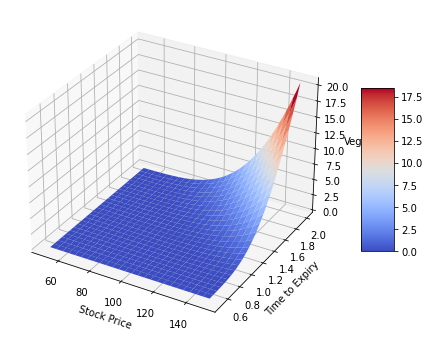

In [212]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [36]:
v = vega(339.39, 450, 1.0, 0.13, 0, 0.3122, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 128.176 . If the volatility increases 1%, then the value of the option will increase $ 1.28176 .
